In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/diabetes-dataset/diabetes2.csv


**Using LOGISTIC REGRESSION we are predicting Diabetics**

In [2]:
#First we have to import all required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the csv file using pandas 

Data=pd.read_csv('/kaggle/input/diabetes-dataset/diabetes2.csv')
Data.head() #top 5 rows of data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#finding out null values
#Data.isnull().sum().sum()
Data.isnull() # so there is no null values in our dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


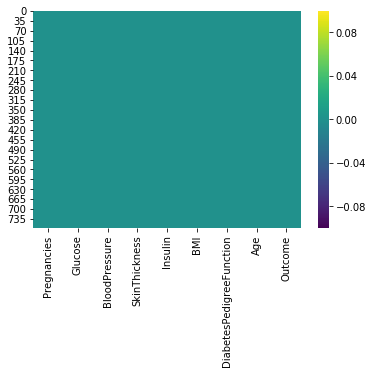

In [6]:
#finding the null values using heatmap 
sns.heatmap(Data.isnull(),cmap='viridis') #so there is null values or there is no shades

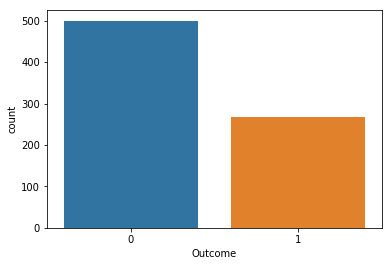

In [7]:
#graph using seaborn library 
sns.countplot('Outcome',data=Data) #here In this graph you see the count of Diabetes members 

In [8]:
#now we are creating X(independent features) & y(dependent values)

X=Data.iloc[:,[0,1,2,3,4,5,6,7]].values # from column 0 to 7 
y=Data.iloc[:,-1].values #last column

In [9]:
#splitting dataset into training and test set
#here we are importing traintestsplit function from library sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=33) #iam giving a testsize value is 30% & random state is 30 value

In [10]:
X_train

array([[2.00e+00, 8.50e+01, 6.50e+01, ..., 3.96e+01, 9.30e-01, 2.70e+01],
       [1.20e+01, 1.21e+02, 7.80e+01, ..., 2.65e+01, 2.59e-01, 6.20e+01],
       [2.00e+00, 9.20e+01, 5.20e+01, ..., 3.01e+01, 1.41e-01, 2.20e+01],
       ...,
       [2.00e+00, 1.75e+02, 8.80e+01, ..., 2.29e+01, 3.26e-01, 2.20e+01],
       [5.00e+00, 1.66e+02, 7.60e+01, ..., 4.57e+01, 3.40e-01, 2.70e+01],
       [3.00e+00, 1.26e+02, 8.80e+01, ..., 3.93e+01, 7.04e-01, 2.70e+01]])

In [11]:
#lets create a model using logistic regression algorithm

from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(random_state=0) #creating a object called clf
clf.fit(X_train,y_train) # fit the train datasets

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
#now predict the X_test
y_pred=clf.predict(X_test)

In [13]:
#finding accuracy of model
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_pred,y_test))

[[133  45]
 [ 13  40]]


Classification report is

In [14]:
#macro average (averaging the unweighted mean per label)
#weighted average (averaging the support-weighted mean per label)(i.e. the number of correctly predicted instances in that class, divided by the total number of instances in that class)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.91      0.75      0.82       178
           1       0.47      0.75      0.58        53

    accuracy                           0.75       231
   macro avg       0.69      0.75      0.70       231
weighted avg       0.81      0.75      0.77       231

